# Importing libraries and data and dropping columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/zoipisourika/Desktop/Career Foundry/Data Immersion/Achievement 6/Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data','boat_data_clean3.csv'))

In [5]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Year Built,Length,Width,Material,Views,Price,Country,City,New or Used,Engine Type,Price Category,Views Category
0,0,Motor Yacht,Rigiflex power boats,2017,4.00,1.90,Unknown,226,3370,Switzerland,Lake Geneva,New boat,Unknown,Cheap,Upper-range views
1,1,Center console boat,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt,New boat,Unknown,Cheap,Middle-range views
2,2,Sport Boat,Marine power boats,2007,3.69,1.42,Aluminium,124,3807,Switzerland,Lake of Zurich,New boat,Unknown,Cheap,Middle-range views
3,3,Sport Boat,Pioner power boats,2020,3.00,1.00,Unknown,64,3367,Denmark,Svendborg,New boat,Unknown,Cheap,Low-range views
4,4,Fishing Boat,Linder power boats,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern,New boat,Unknown,Cheap,Low-range views


In [6]:
df2 = df.drop(columns = ['Unnamed: 0', 'Boat Type', 'Manufacturer', 'Material', 'Country', 'City', 'New or Used', 'Engine Type', 'Price Category', 'Views Category'])

In [7]:
df2.head()

,Year Built,Length,Width,Views,Price
0,2017,4.00,1.90,226,3370
1,2020,4.00,1.50,75,3490
2,2007,3.69,1.42,124,3807
3,2020,3.00,1.00,64,3367
4,2019,3.55,1.46,58,3399


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df2)

# The elbow technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-9228087954215086.0,
 -3632118354749212.0,
 -2058015571140069.8,
 -1170980273860867.0,
 -803273089365244.6,
 -566329547604226.9,
 -399781275394889.4,
 -297845608556604.4,
 -238700228268767.84]

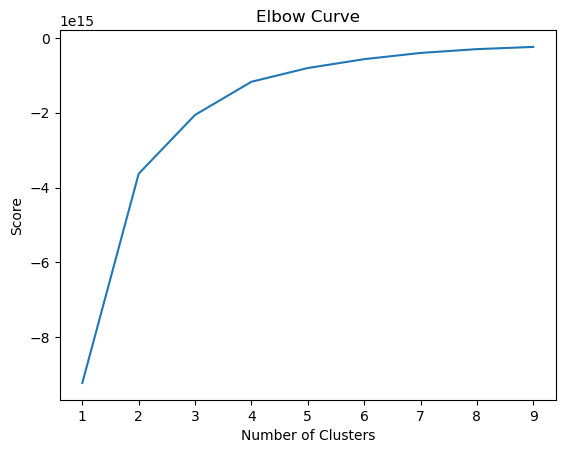

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The largest jump is from 3 to 4 in the x-axis and then the curve straightens out, so the optimal count for the clusters is four. 

# k-means clustering

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [21]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=4)

In [22]:
df2['clusters'] = kmeans.fit_predict(df2)

In [23]:
df2.head()

,Year Built,Length,Width,Views,Price,clusters
0,2017,4.00,1.90,226,3370,0
1,2020,4.00,1.50,75,3490,0
2,2007,3.69,1.42,124,3807,0
3,2020,3.00,1.00,64,3367,0
4,2019,3.55,1.46,58,3399,0


In [24]:
df2['clusters'].value_counts()

0    9299
2     401
3      68
1      10
Name: clusters, dtype: int64

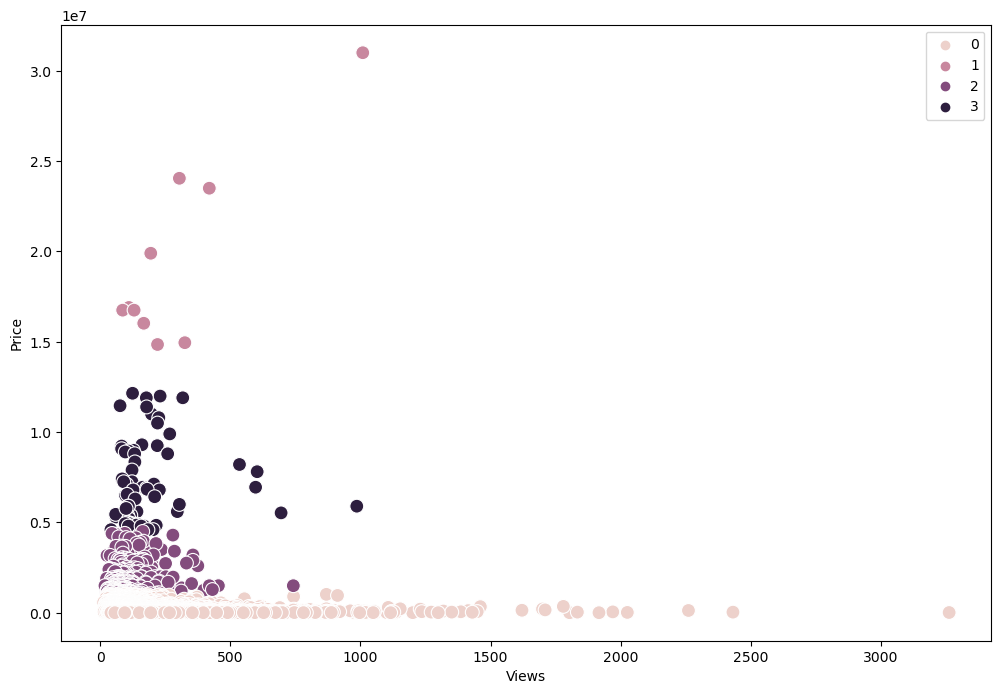

In [25]:
# Plot the clusters for the "Views" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Views'], y=df2['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Views') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### Discussion

#### Cluster 1 groups together the boats that were viewed up to 500 times (with one exception) and are in the highest price categories.

#### Cluster 3 groups together the mid-range priced boats that were viewed up to 1000 times.

#### Cluster 2 groups together the lower-priced boats that were viewed up to 500 times with two exceptions

#### Cluster 0 groups together the cheaper boats

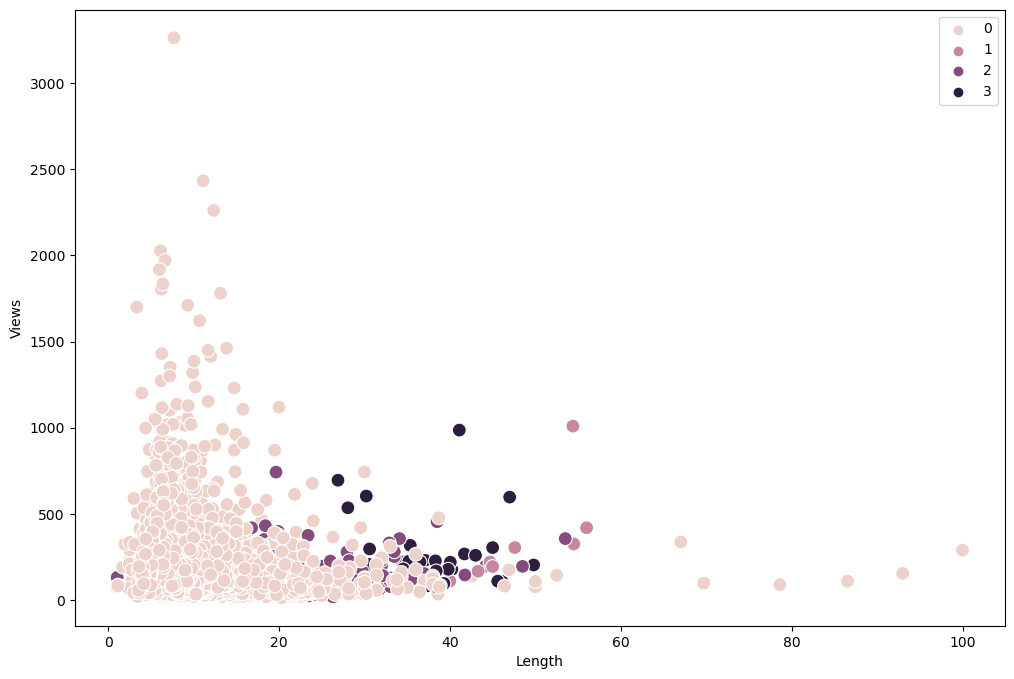

In [26]:
# Plot the clusters for the "Length" and "Price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Length'], y=df2['Views'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Views') # Label y-axis.
plt.show()

### Discussion

#### This scatterplot doesn't make much sense, reiterating the lack of connection between boat length and views

In [27]:
# Descriptive stats
df2.groupby('clusters').agg({'Views':['mean', 'median'], 
                         'Length':['mean', 'median'], 
                         'Width':['mean', 'median'],
                          'Price':['mean', 'median']})

Views            Length             Width                Price  \
                mean median       mean  median      mean median          mean   
clusters                                                                        
0         148.611571  107.0  10.896400   9.990  3.386889   3.25  1.633735e+05   
1         296.400000  207.0  45.810000  44.850  9.130000   9.50  1.946750e+07   
2         108.194514   87.0  22.805985  22.260  5.845187   5.60  1.886322e+06   
3         185.867647  132.5  33.350882  31.725  7.276471   7.35  7.160562e+06   

                      
              median  
clusters              
0            85900.0  
1         16825000.0  
2          1620000.0  
3          6677499.5

### Discussion

#### The cheaper boats (cluster 0) are also the ones with the smallest width and length (i.e. the smallest).

#### The most epxensive boats (in cluster 1) have the highest average of views and the highest average of length and width indicating they are the largest boats.

#### Cluster 3 contains the second most expensive boats which also received the second largest number of views on average and are the second largest boats on average based on length and width compared to the other groups.

#### Therefore, it looks like the number of views for each boat is related to its size and price for the highest priced boats and for the cheapest ones too. Mid-range priced/sized boats receive the least amount of views on average.

## Next steps in the Analytics Pipeline

- A classification algorithm could potentially be used to predict number of views based on a combination of the size and price of each boat.

In [30]:
df2.to_excel(os.path.join(path, "Prepared Data", "clusters.xlsx"))